# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [5]:
# Your code here. 
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

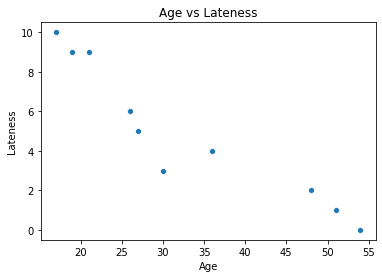

In [8]:
plot = sns.scatterplot(x="X", y="Y", data=student_data, )
plot.set(xlabel='Age', ylabel='Lateness', title = 'Age vs Lateness')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
#There is a linear trend between age and lateness; with lateness being negatively correlated with age.
#There is an exception with the student at the age of 30; who was only late 3 times. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
print(student_data.corr())
print(student_data.cov())

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


In [9]:
#Comments 
#There's a negative correlation here, with increase in X resulting in a decrease of Y

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.
model = sm.OLS(student_data['Y'],student_data['X'])
results = model.fit()
predictions = results.predict(student_data['X'])
pd.DataFrame({'observed': student_data['Y'], 'predicted':predictions}).sort_values(by='observed')


,observed,predicted
8,0,5.187245
1,1,4.899065
5,2,4.610885
9,3,2.881803
4,4,3.458164
2,5,2.593623
7,6,2.497563
3,9,2.017262
6,9,1.825142
0,10,1.633022


In [ ]:
#What will be your outcome variable? Predicted (Lateness)
#What type of regression are you using? Linear regression. 
#Comments: There is a notable difference between predicted and observed value. 
#That means the model is not doing a great job vs reality

Plot your regression model on your scatter plot.

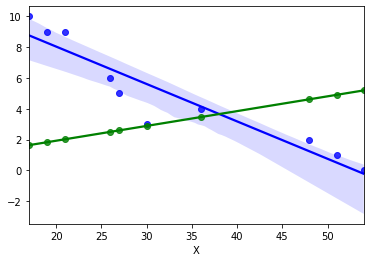

In [16]:
# Your code here.
sns.regplot(student_data['X'], student_data['Y'], data=student_data,color = 'blue' )
sns.regplot(student_data['X'], predictions, data=student_data, color = 'green' )

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#I plotted the actual data vs predictions as per suggestion during the course; 
#We can see that the regressions have a different direction and cross only in one point. 
#So even though there is a rather clear relation between X (age) and Y (lateness) in the data, 
#I would not use this model to predict & build on assumptions. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need 
#Imported up top 

In [18]:
# Import the data
vehicles = pd.read_csv('../data/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

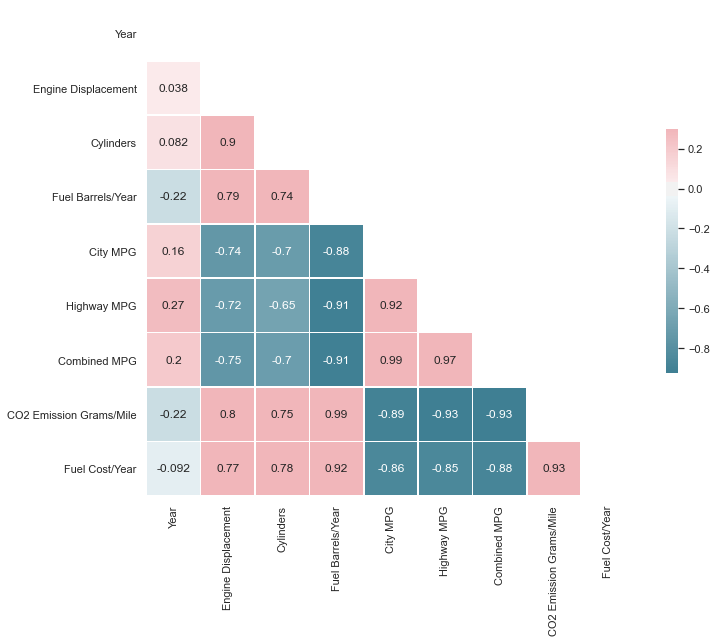

In [19]:
# Your response here. 
#Correlation Matrix 
# your code here
sns.set(style="white")
# Compute the correlation matrix
corr = vehicles.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [24]:
#Which variable do you think will be the most important in determining CO2 emissions? 


'FuelBarrel/Year' is correlated at 0.99 and it's a positive corr. 
There's also a few strong negative corr's here ('City MPG'; 'Highway MPG'; 'Combined MPG'), but they are below in p-value when compared to 'FuelBarrel/Year'.

In [25]:
#Which provides the least amount of helpful information for determining CO2 emissions? 

I'd say 'Year'; with a low negative correlation at -0.22.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [26]:
# Your response here. 
y = vehicles['CO2 Emission Grams/Mile']
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

model = sm.OLS(y, x)
results = model.fit()
predictions = results.predict(x)
pd.DataFrame({'observed': y, 'predicted':predictions})

#What type of regression are you using? Multiple regression 

,observed,predicted
0,522.764706,518.638632
1,683.615385,668.608594
2,555.437500,550.196992
3,683.615385,668.671588
4,555.437500,565.236341
...,...,...
35947,244.000000,233.579134
35948,243.000000,233.642128
35949,244.000000,233.705122
35950,246.000000,233.768116


In [27]:
x = vehicles['Fuel Barrels/Year']

results = sm.OLS(y, x).fit()
predictions = results.predict(x)
lin = pd.DataFrame({'observed': y, 'predicted':predictions})
lin
#What type of regression are you using? Linear regression

,observed,predicted
0,522.764706,522.525796
1,683.615385,683.302964
2,555.437500,555.183658
3,683.615385,683.302964
4,555.437500,555.183658
...,...,...
35947,244.000000,246.748293
35948,243.000000,246.748293
35949,244.000000,246.748293
35950,246.000000,246.748293


In [28]:
#In this case, the Linear regression model does a better job predicting CO2 emissions values. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [29]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Tue, 05 May 2020   Prob (F-statistic):                        0.00
Time:                             15:00:34   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#What are the most important variables in your model and why? 

The most important variables would be CO2 emissions and FuelBarriers/Year. 

In [ ]:
#What can conclusions can you draw from your model and how confident in these conclusions are you? 

Our prediction power is quite high with Least Squares R^2 ar 0.998; and low stderror at 0.006 (specific to 'FuelBarrels/Year'). The Durbin-Watson also shows a positive autocorrelation. This means that the model is alright in the prism of the tools we have. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 